In [11]:
import numpy as np
import pandas as pd
import re

from scipy.spatial.distance import cosine
from gensim.models.keyedvectors import Vocab, KeyedVectors
from tqdm import tqdm_notebook

from sources import parse_glove_vocab

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [13]:
pd.options.display.max_rows = 1000

In [14]:
m1 = KeyedVectors.load_word2vec_format('../data/corpora/north-south/new-england.w2v.txt')

In [15]:
m2 = KeyedVectors.load_word2vec_format('../data/corpora/test/new-england.w2v.txt')

In [16]:
vocab = parse_glove_vocab('../data/corpora/north-south/vocab.txt')

In [17]:
v1 = parse_glove_vocab('../data/corpora/north-south/new-england.vocab.txt')

In [18]:
v2 = parse_glove_vocab('../data/corpora/north-south/deep-south.vocab.txt')

In [19]:
m1_m = np.stack([m1[t] for t in vocab])

In [20]:
m2_m = np.stack([m2[t] for t in vocab])

In [21]:
bv = m1_m - m1_m.mean(0)

In [22]:
ov = m2_m - m2_m.mean(0)

In [23]:
m = ov.T.dot(bv)

In [24]:
u, _, v = np.linalg.svd(m)

In [25]:
ortho = u.dot(v)

In [26]:
m2_m_rotated = ov.dot(ortho)

In [27]:
vector_size = m2_m_rotated.shape[1]

m2r = KeyedVectors()
m2r.vector_size = vector_size
m2r.syn0 = np.zeros((len(m2_m_rotated), vector_size))

In [28]:
for i, (token, count) in enumerate(vocab.items()):
    m2r.syn0[i] = m2_m_rotated[i]
    m2r.index2word.append(token)
    m2r.vocab[token] = Vocab(index=i, count=count)

In [31]:
cosine(m1['god'], m2r['god'])

0.050908625258590856

In [32]:
len(m1['god'])

200

In [33]:
len(m1.vocab)

8105

In [76]:
data = []
for token in tqdm_notebook(vocab.keys()):
    
    if not re.match('^[a-z]+$', token):
        continue
    
    sim = 1 - cosine(m1[token], m2r[token])
    
    c1 = v1[token]
    c2 = v2[token]

    cr = min([c1, c2]) / max([c1, c2])
    
    data.append((token, vocab[token], c1, c2, cr, sim))

HBox(children=(IntProgress(value=0, max=8104), HTML(value='')))

In [77]:
df = pd.DataFrame(data, columns=('token', 'tc', 'c1', 'c2', 'cr', 'sim'))

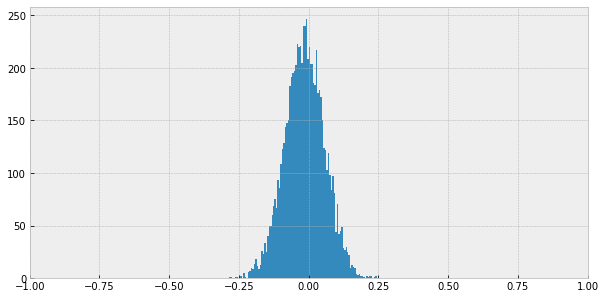

In [75]:
plt.figure(figsize=(10, 5))
plt.xlim(-1, 1)
_ = plt.hist(df['sim'], bins=100)

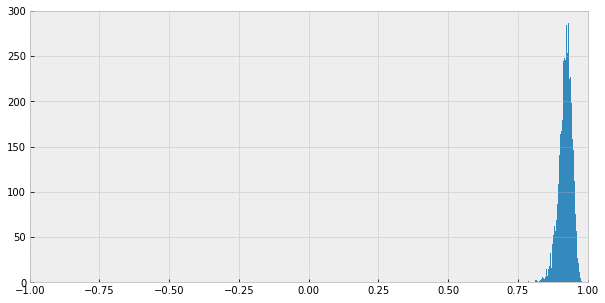

In [79]:
plt.figure(figsize=(10, 5))
plt.xlim(-1, 1)
_ = plt.hist(df['sim'], bins=100)